In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# working with mg spring system  with following knowns
# DOWN is + x 
# F_net = + mg - k (x-L)
m = 2 # kg
k = 100 # N/m
g = 9.8 # N/kg
L = 0.50 # meters relaxed spring length from mount point
x_eq = L + m*g / k # equilibrium stretch (F_net=0) from mount point
omega = (k/m)**0.5 # natural oscillation frequency

# solving this set of equations
# m dv_dt = + m*g - k*(x-L)
# dx_dt = v 

period = 2.0*math.pi/omega
time_limit = 2.5*period
N=100
dt = period/N

# the VERLET integrator needs two initial state points
t1 = 0
x1 = L + 1.1*x_eq 
v1 = 0.0
a1 = (m*g - k*(x1-L))/m
# using kinematics to get the second starting point - source of error! 
x2 = x1 + v1*dt + 0.5*a1*dt*dt
v2 = v1 + a1*dt
t2 = t1 + dt

print("period (s) = %f"%period)
print("L + mg/k = %.3f + %.3f = %.3f (meters)"%(L,m*g/k,x_eq))
print("(x1, x2) = (%.3f, %.3f)"%(x1,x2))
print("dt = %.2e (seconds)"%dt)

# storage arrays
v_2s=[]
x_2s=[]
t_2s=[]
KE_2s=[]
Ug_2s=[]
Uspring_2s=[]
Etot_2s=[]

# repeat DiffEq solver procedure many many times to get an approximate model for the motion
while (t2<time_limit) :
    
    F2 = m*g - k*(x2-L)
    a2 = F2/m
    # apprimately solve differential equation over a very short time interval
    # using the "Velocity Verlet" DEQ integrator
    # x3 = new position, i+1
    # x2 = current position, i
    # x1 = old position, i-1
    x3 = 2*x2 - x1 + a2*dt*dt
    v2 = (x3-x1)/(2*dt)
    t2 = t2 + dt
    
    # store the current dynamic values
    v_2s.append(v2)
    x_2s.append(x2)
    t_2s.append(t2)
    
    KE = 0.5*m*v2**2
    Ug = -m*g*x2
    Uspring = 0.5*k*(x2-L)**2
    Etot = KE+Ug+Uspring
    
    KE_2s.append(KE)
    Ug_2s.append(Ug)
    Uspring_2s.append(Uspring)
    Etot_2s.append(Etot)
    
    # update/recycle values for the next loop
    x1 = x2
    x2 = x3
 

period (s) = 0.888577
L + mg/k = 0.500 + 0.196 = 0.696 (meters)
(x1, x2) = (1.266, 1.264)
dt = 8.89e-03 (seconds)


Text(0.5, 0, 'time (seconds)')

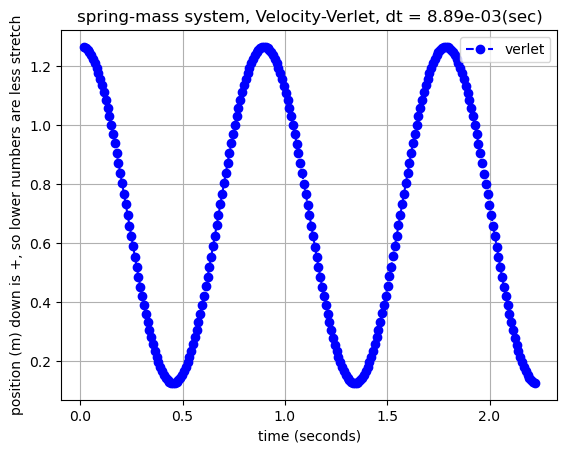

In [20]:
plt.plot(t_2s,x_2s,label="verlet", linestyle='--', marker='o', color='b')
plt.grid()
plt.legend()
plt.title("spring-mass system, Velocity-Verlet, dt = %.2e(sec)"%dt)
plt.ylabel("position (m) down is +, so lower numbers are less stretch")
plt.xlabel("time (seconds)")

Text(0.5, 0, 'time (seconds)')

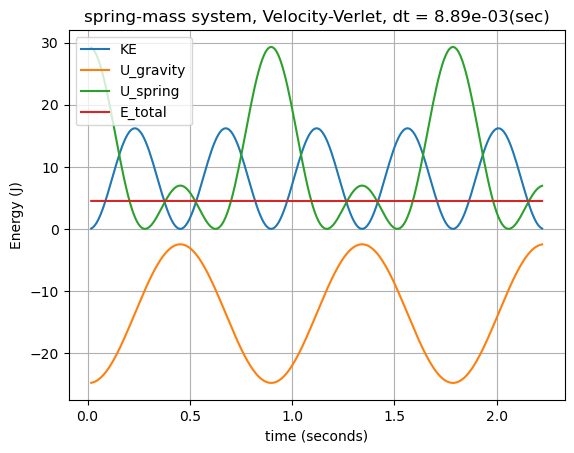

In [22]:
plt.plot(t_2s,KE_2s,label="KE")
plt.plot(t_2s,Ug_2s,label="U_gravity")
plt.plot(t_2s,Uspring_2s,label="U_spring")
plt.plot(t_2s,Etot_2s,label="E_total")
plt.grid()
plt.legend()
plt.title("spring-mass system, Velocity-Verlet, dt = %.2e(sec)"%dt)
plt.ylabel("Energy (J)")
plt.xlabel("time (seconds)")

Text(0, 0.5, 'velocity (m/s)')

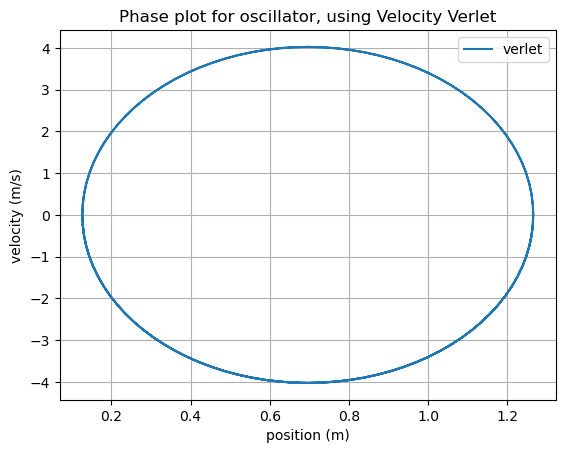

In [24]:
plt.plot(x_2s,v_2s,label="verlet")
plt.grid()
plt.legend()
plt.title("Phase plot for oscillator, using Velocity Verlet")
plt.xlabel("position (m)")
plt.ylabel("velocity (m/s)")


In [26]:
# compute and plot change in energy
print(Etot_2s[0],Etot_2s[len(Etot_2s)-1])

4.501344854761989 4.5013499366958705


Text(0, 0.5, '($E_{total} - E_{total 0})/E_{total 0}$')

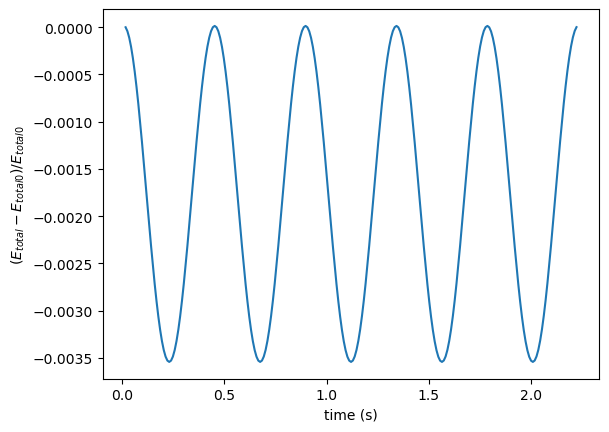

In [28]:
fractional_gain = []
for E in Etot_2s:
    fractional_gain.append((E-Etot_2s[0])/Etot_2s[0])    
plt.plot(t_2s,fractional_gain)
plt.xlabel("time (s)")
plt.ylabel("($E_{total} - E_{total 0})/E_{total 0}$")